In [1]:
# install additional packages
!pip install --upgrade plotly
!pip install cufflinks bokeh 

# restart runtime!!!!!!!!!

    100% |████████████████████████████████| 37.0MB 426kB/s 
  Running setup.py bdist_wheel for retrying ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
  Found existing installation: plotly 1.12.12
    Uninstalling plotly-1.12.12:
      Successfully uninstalled plotly-1.12.12
    100% |████████████████████████████████| 71kB 2.4MB/s 
    100% |████████████████████████████████| 16.0MB 2.3MB/s 
    100% |████████████████████████████████| 163kB 18.5MB/s 
    100% |████████████████████████████████| 112kB 27.6MB/s 
    100% |████████████████████████████████| 2.2MB 996kB/s 
  Running setup.py bdist_wheel for cufflinks ... - \ done
  Stored in directory: /root/.cache/pip/wheels/7b/5a/98/30259388b784d11af96230b6f843add608d8f845d2048e54ba
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/05/3e/43/95ff0bd

In [2]:
# execute this cell before and after update plotly
# check the version
from plotly import __version__
__version__ 

'3.2.1'

In [3]:
# import cufflinks (wrapper pandas with plotly)
# configure to offline version
import cufflinks as cf
cf.set_config_file(offline=True)
cf.__version__

## 1.0 Introduction




In this lesson we will learn about the most commonly used model for **parametric machine learning** approaches, the **linear regression** algorithm. In a parametric machine learning the result of the training process is a mathematical function that best approximates the patterns in the training set. In machine learning, this function is often referred to as a **model**.

Parametric machine learning approaches work by making assumptions about the relationship between the features and the target column. In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:



$$
\displaystyle
y=a_1x_1+a_2x_2+a_3x_3+...+a_nx_n
$$



The following diagram provides an overview of the machine learning process for linear regression. For now, the goal isn't to understand the entire process but just give a big picture about the algorithm.

<img width="900" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1cKHRMMKvTljQ8aotpnbzSeXdlDgqd7bG">

In this mission, we'll provide an overview of **how we use a linear regression model to make predictions**. We'll use **scikit-learn** for the model training process, so we can focus on gaining intuition for the model-based learning approach to machine learning. Later, we'll dive the math behind how a model is fit to the dataset, how to select and transform features, and more.


## 2.0 Introduction to the data



To get familiar with this machine learning approach, we'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this course, we'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf) and download the dataset [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt).

Here are some of the columns:

- **Lot Area**: Lot size in square feet.
- **Overall Qual**: Rates the overall material and finish of the house.
- **Overall Cond**: Rates the overall condition of the house.
- **Year Built**: Original construction date.
- **Low Qual Fin SF**: Low quality finished square feet (all floors).
- **Full Bath**: Full bathrooms above grade.
- **Fireplaces**: Number of fireplaces.




In [5]:
# Uploading files from your local file system
# AmesHousing.txt

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AmesHousing.txt to AmesHousing.txt
User uploaded file "AmesHousing.txt" with length 963738 bytes


Let's start by generating train and test datasets and getting more familiar with the data.


---

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

---



- Read **AmesHousing.txt** into a dataframe using the tab delimiter (**\t**) and assign to **data**.
- Using [scikit-learn(train_test_split)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
) split **data** into two variables: **train** and **test**. Each one has 50% of the dataset.
- Use the **dataframe.info()** method to display information about each column.
- Read the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) to get more familiar with each column.
- Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to **target**.
- Reproduce the Figure (linear regression) of Slide #7.

- *Read* **AmesHousing.txt** into a dataframe using the tab delimiter (**\t**) and assign to **data**.

In [6]:
# Traditional approach using pandas and head() for the first visualization
import pandas as pd

data = pd.read_csv("AmesHousing.txt", sep='\t')
print(data.shape)
data.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

- Using [scikit-learn(train_test_split)](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
) split **data** into two variables: **train** and **test**. Each one has 50% of the dataset.

In [8]:
from sklearn.model_selection import train_test_split

columns = ['Lot Area','Gr Liv Area','Garage Area','Overall Cond','Year Built', 'Yr Sold', 'SalePrice']

train, test = train_test_split(data,
                               test_size=0.5,
                               random_state=42)

print("data has {} instances\n {} train instances\n {} test intances".
      format(data.shape[0],train.shape[0],test.shape[0]))


data has 2930 instances
 1465 train instances
 1465 test intances


In [0]:
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [10]:
# Using plotly to visualize your data in a fancy way
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# transform into a table
table = ff.create_table(train[columns].head())
table.layout.width=650

pyo.iplot(table)

In [11]:
train[columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 925 to 860
Data columns (total 7 columns):
Lot Area        1465 non-null int64
Gr Liv Area     1465 non-null int64
Garage Area     1464 non-null float64
Overall Cond    1465 non-null int64
Year Built      1465 non-null int64
Yr Sold         1465 non-null int64
SalePrice       1465 non-null int64
dtypes: float64(1), int64(6)
memory usage: 91.6 KB


In [12]:
train[columns].describe()

,Lot Area,Gr Liv Area,Garage Area,Overall Cond,Year Built,Yr Sold,SalePrice
count,1465.000000,1465.000000,1464.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,10206.443003,1499.481229,472.241120,5.584983,1970.479863,2007.767918,179697.833447
std,8616.102022,504.834935,215.575502,1.120984,30.422005,1.315391,77938.505193
min,1300.000000,334.000000,0.000000,1.000000,1872.000000,2006.000000,12789.000000
25%,7438.000000,1126.000000,319.000000,5.000000,1953.000000,2007.000000,129900.000000
50%,9350.000000,1440.000000,480.000000,5.000000,1972.000000,2008.000000,160500.000000
75%,11526.000000,1750.000000,576.000000,6.000000,2000.000000,2009.000000,210250.000000
max,215245.000000,5095.000000,1488.000000,9.000000,2010.000000,2010.000000,755000.000000


**Iago Diógenes:**
- Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to target.

The target of the problem is the 'SalePrice'


In [0]:
target = train['SalePrice']

**Iago Diógenes:**
- Reproduce the Figure (linear regression) of Slide #7.

In [0]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_y = train['SalePrice'].copy()
train_x = train['Lot Area'].copy()

test_x = test['Lot Area'].copy()

train_x = train_x.values.reshape(-1, 1)
test_x = test_x.values.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(train_x,train_y)

price_pred = linreg.predict(test_x)

array([[ 8145],
       [ 9548],
       [12388],
       ...,
       [ 8791],
       [ 7308],
       [ 7200]])

In [75]:
# Plotting, first with matplotlib
plt.scatter(train_x,train_y)
plt.plot(test_x,price_pred,color='red')
plt.show()


# Now with plotly
# DOCUMENTATION: https://plot.ly/python/line-and-scatter/

from plotly import tools
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

trace1 = go.Scatter(x=train['Lot Area'].copy(),y=train['SalePrice'].copy(),mode='markers')
trace2 = go.Scatter(x=test['Lot Area'].copy(),y=price_pred,mode='lines')
data = [trace1, trace2]

pyo.iplot({
    "data": data,
    "layout": go.Layout(title="Linear Regression - Housing Price")})

In [20]:
#linreg.fit(train, train_y)

columns1 = ['Lot Area','Overall Qual','Year Built','Yr Sold','SalePrice']

# Using plotly to visualize your data in a fancy way
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# transform into a table
table1 = ff.create_table(train[columns1].head())
table1.layout.width=650

pyo.iplot(table1)

## 3.0 Simple Linear Regression


We'll start by understanding the univariate case of linear regression, also known as **simple linear regression**. The following equation is the general form of the simple linear regression model.

$$\hat{y}= h_\theta(x) = \theta_1x_1+\theta_0$$

$\hat{y}$ represents the target column while $x_1$ represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, $\theta_0$ and $\theta_1$ represent the **parameter** values that are specific to the dataset. **The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column**. The following diagram shows different simple linear regression models depending on the data:

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1aYSv01fP3tEoEukxRmMZFcfJwZfzS-UV">


The first step is to select the feature, $x_1$, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values $\theta_1$ and $\theta_0$ based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

In [40]:
# For documentation about subplot please see below
# https://plot.ly/python/subplots/

from plotly import tools
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

trace = []

features = ['Lot Area',"Garage Area","Gr Liv Area","Overall Cond"]
target = 'SalePrice'

for feature in features:
  trace.append(go.Scatter(x=train[feature],
                          y=train[target],
                          mode='markers',
                          name=feature)
              )

# layout of grid 2 rows vs 2 columns (2,2)
fig = tools.make_subplots(rows=2, cols=2,print_grid=False)

# add each trace to figure
for i in range(len(features)):
  fig.append_trace(trace[i],(i//2)+1,(i%2)+1)
  
# y axis label
fig['layout']['yaxis1'].update(title='Sale Price (U$)')
fig['layout'].update(margin=go.layout.Margin(l=50,r=50,b=100,t=100,pad=0))

pyo.iplot(fig)

## 4.0 Least Squares

From the last section, we can tell that the **Gr Liv Area** feature correlates the most with the **SalePrice** column. We can confirm this by calculating the correlation between pairs of these columns using the [pandas.DataFrame.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method:

In [0]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'Lot Area','SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,Lot Area,SalePrice
Garage Area,1.000000,0.473506,-0.145705,0.213122,0.625335
Gr Liv Area,0.473506,1.000000,-0.134157,0.248676,0.706364
Overall Cond,-0.145705,-0.134157,1.000000,-0.042415,-0.108979
Lot Area,0.213122,0.248676,-0.042415,1.000000,0.267714
SalePrice,0.625335,0.706364,-0.108979,0.267714,1.000000



The correlation between **Gr Liv Area** and **SalePrice** is around 0.706364	, which is the highest. Recall that the closer the correlation coefficient is to 1.0, the stronger the correlation. Here's the updated form of our model:

$$\hat{y}=\theta_1 \times\textrm{Gr Liv Area}+\theta_0$$

Let's now move on to understanding the model fitting criteria.

### 4.1 Residual Sum Of Squares

To find the optimal parameters for a linear regression model, we want to optimize the model's residual sum of squares (or [RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)). If you call, residual (often referred to as errors) describes the difference between the predicted values for the target column ($\hat{y}$) and the true values ($y$):


<img width="150" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=154sWwnilnUvyrfe2QlfL6uyylRxh3hL0">


We want this difference to be as small as possible. Calculating RSS involves summing the squared errors:

$$
RSS = (y^{(1)} - \hat{y}^{(1)})^2 + (y^{(2)}  - \hat{y}^{(2)})^2 + \ldots + (y^{(m)} - \hat{y}^{(m)})^2
$$
We can shorten this to:

$$
RSS=\sum_{i=1}^m (y^{(i)}−\hat{y}^{(i)})^2
$$

If you recall, the calculation for RSS seems very similar to the calculation for MSE (mean squared error). Here's the formula for MSE, adapted for our new notation:


$$
\displaystyle
MSE=\frac{1}{m}\sum_{i=1}^m(y^{(i)}−\hat{y}^{(i)})^2
$$



While we used the MSE on the test set, it's clear that the goal of minimizing RSS on the training set when training is a good idea.

Our hypothesis:

$$
\hat{y} = h_\theta(x) = \theta_0 + \theta_1 x
$$

Cost function:

$$
\displaystyle
J(\theta_0,\theta_1) = \frac{1}{2m} \sum^{m}_{i=1}\left [ h_\theta(x^{(i)}) - y^{(i)}) \right ]^2
$$




### 4.2 Intuiton of the cost function

**Intuition #01**

For $\theta_0 = 0$
$$
\begin{eqnarray}
\hat{y} = h_\theta(x) =& \theta_0 + \theta_1 x\\
\hat{y} = h_\theta(x) =& \theta_1 x
\end{eqnarray}
$$

Cost function:

$$
\displaystyle
J(\theta_1) = \frac{1}{2m} \sum^{m}_{i=1}\left [ \theta_1 x^{(i)} - y^{(i)}) \right ]^2
$$

In [0]:
import numpy as np

def cost_function(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [0]:
# X = [1 x1
#      1 x2
#      1 x3]
#
# theta = [t0 
#          t1]
#
# X . theta = [t0 + t1 . x1
#              t0 + t1 . x2
#              t0 + t1 . x3]
#

X = np.column_stack((np.ones(len(train['Gr Liv Area'])), 
                     train['Gr Liv Area']))
y = train['SalePrice']

all_theta_1 = np.arange(-400,600)

# create all poins to initial plot (right figure)
all_j_theta_1 = [cost_function(X, y, [0,theta])
                 for theta in all_theta_1]

In [0]:
# exotic plots :-)

from bokeh.models import ColumnDataSource
from bokeh.layouts import column, row
from bokeh.models import CustomJS, ColumnDataSource, Slider, Paragraph
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
import numpy as np


################## Rigth figure - J(theta_1) vs theta_1 #####################


# create source
source_theta1 = ColumnDataSource(data=dict(x=all_theta_1, 
                                           y=all_j_theta_1))

# create a figure
right_fig = figure(x_axis_label = '\u03B8_1',
            y_axis_label = 'J(\u03B8_1)',
            plot_width = 400,
            plot_height = 400)

# initial plot
right_fig.line(source=source_theta1, x="x", y="y")

# create source to a single red circle
source_point = ColumnDataSource({'x': [250], 'y': [all_j_theta_1[650]]})
right_fig.circle(source=source_point,x='x', y='y',
          size=10,fill_color='red')


########### Left figure - Scatter plot: Gr Liv Area vs SalePrice #############
# create scatter dataset
source_scatter = ColumnDataSource(train)

# initial linear regression model
x2 = np.linspace(0,3600,1000)
y2 = 250*x2 + 0

# create linear regression dataset
source_reg = ColumnDataSource(data=dict(x=x2, y=y2))

# create a figure
left_fig = figure(x_axis_label = 'Gr Liv Area',
           y_axis_label = 'SalePrice',
           plot_width = 400,
           plot_height = 400)

# scartter plot
left_fig.circle(source=source_scatter, x="Gr Liv Area", y="SalePrice")

# regression plot
left_fig.line('x', 'y', source=source_reg, line_width=3, 
              line_alpha=0.6, color='red')


########################## interactive part #################################
update_curve = CustomJS(args=dict(source=source_reg,
                                  source2=source_scatter,
                                  source3=source_point), code="""
    var data = source.data;
    var data2 = source2.data;
    var data3 = source3.data;
    x = data['x']
    y = data['y']
    x2 = data3['x']
    y2 = data3['y']
    x_real = data2['Gr Liv Area']
    y_real = data2['SalePrice']
    a_1 = slider_a1.value;
    j_theta = 0
    for (i = 0; i < x.length; i++) {
       y[i] = x[i]*a_1 + 0
    }
    for (i = 0; i < x_real.length; i++){
        y_hat = a_1*x_real[i] + 0
        j_theta = j_theta + Math.pow(y_real[i] - y_hat,2)
    }
    j_theta = j_theta/(2*x_real.length) 
    x2[0] = a_1
    y2[0] = j_theta
    paragraph.text = "J(" + a_1.toString() + ") = " + j_theta.toString()
    source.change.emit();
    source3.change.emit();
""")


slider_a1 = Slider(start=-400.0, end=600, value=0, step=1, 
                  title="A1", callback=update_curve)
update_curve.args["slider_a1"] = slider_a1

paragraph = Paragraph(text="J(\u03B8_1) = ---")
update_curve.args["paragraph"] = paragraph

show(column(paragraph,row(left_fig,right_fig),slider_a1))


output_notebook()


Loading BokehJS ...

**Intuition #02**

$\theta_0$ and $\theta_1$ are defined
$$
\begin{eqnarray}
\hat{y} = h_\theta(x) =& \theta_0 + \theta_1 x
\end{eqnarray}
$$

Cost function:

$$
\displaystyle
J(\theta_0,\theta_1) = \frac{1}{2m} \sum^{m}_{i=1}\left [ h_\theta(x^{(i)}) - y^{(i)}) \right ]^2
$$

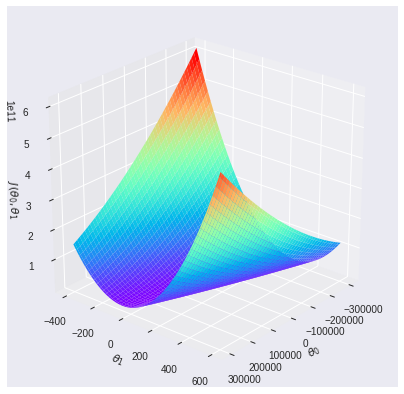

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

X = np.column_stack((np.ones(len(train['Gr Liv Area'])), 
                     train['Gr Liv Area']))
y = train['SalePrice']

# meshgrid? https://stackoverflow.com/questions/36013063/what-is-purpose-of-meshgrid-in-python-numpy/36014586
Xs, Ys = np.meshgrid(np.linspace(-300000, 300000, 100), np.linspace(-400,600,100))
Zs = np.array([cost_function(X, y, [t0, t1]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
Zs = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d")
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta_0,\theta_1$')
ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, Zs, cmap=cm.rainbow)

plt.show()

In [0]:

from plotly import tools
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)


data = [
    go.Surface(
        z=Zs,
        y = Ys,
        x = Xs,
        showscale = False,
        colorscale='Rainbow'
    )
]
layout = go.Layout(
    title='Cost Function',
    autosize=False,
    width=800,
    height=500,
    margin=dict(
        l=5,
        r=0,
        b=5,
        t=50
    ),
    scene=dict(
    xaxis=dict(title=r'theta_0'),
    yaxis=dict(title='theta_1'),
    zaxis=dict(title='J(theta_0,theta_1)'))
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


In [0]:
from plotly import tools
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)


data = [
    go.Contour(
        z=Zs,
        y = np.linspace(-400,600,100),
        x = np.linspace(-300000, 300000, 100),
        ncontours=30,
        showscale=False,
        colorscale='Rainbow'
    )
]
layout = go.Layout(
    title='Cost Function',
    autosize=False,
    width=300,
    height=300,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50
    ),
    xaxis=dict(title=r'theta_0'),
    yaxis=dict(title='theta_1')
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


### 4.3 Gradient descent

In [0]:
def gradient_descent(X, y, alpha, iterations, theta):
    m = len(y)
    all_thetas = [theta]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        all_thetas.append([t0,t1])

    return theta, np.array(all_thetas)

In [0]:
# X and y definitions
X = np.column_stack((np.ones(len(train['Gr Liv Area'])), 
                     train['Gr Liv Area']))
y = train['SalePrice']

# basic parameters
iterations = 200
alpha = .00000002
theta_initial = [200000,580]
#theta_initial = [1000,150]

theta,all_thetas = gradient_descent(X, y, alpha, iterations, theta_initial)
cost = cost_function(X, y, theta)

# for each theta in gradient descent calculate its respective cost function
all_costs = []
for i in all_thetas:
  all_costs.append(cost_function(X, y, i))
  
# print the final theta and its respectively cost function  
print("theta:", theta)

print('cost:', cost_function(X, y, theta))

theta: [ 1.99999577e+05 -1.04592569e+00]
cost: 3239790739.133035


In [0]:
from plotly import tools
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)


data = [
    go.Surface(
        z=Zs,
        y = Ys,
        x = Xs,
        showscale = False,
        colorscale='Rainbow'
    ),
    go.Scatter3d(
        x=all_thetas[:,0],
        y=all_thetas[:,1],
        z=all_costs,
        mode="markers+lines"
    )
]
layout = go.Layout(
    title='Cost Function',
    autosize=False,
    width=800,
    height=500,
    margin=dict(
        l=5,
        r=0,
        b=5,
        t=50
    ),
    scene=dict(
    xaxis=dict(title=r'theta_0'),
    yaxis=dict(title='theta_1'),
    zaxis=dict(title='J(theta_0,theta_1)'))
)
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


---

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

---

1. Create a figure comparing the number of iterations of gradient descent algorithm and cost function value.
2. Create a method called **predict**  with the following parameters:
  - list of thetas called **theta**
  - train data called **X**
3. predict() generates len(X) predict values based on linear regresion model parametized by theta list.

## 5.0 Using Scikit-Learn To Train And Predict


Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. 

We will work with the [**sklearn.linear_model.LinearRegression**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. The **LinearRegression** class also has it's own **fit()** method. Specific to this model, however, is the **coef_** and **intercept_** attributes, which return $\theta_1$ ($\theta_1$ to $\theta_n$ if it were a multivariate regression model) and $\theta_0$ accordingly.


In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[109.05143077]
16177.260052889702


## 6.0 Making Predictions


In the last step, we fit a univariate linear regression model between the **Gr Liv Area** and **SalePrice** column. We then displayed the single coefficient and the residuel value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

$$\hat{y}=109.05143077x_1+16177.260052889702$$


One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 109.05 dollars".

We can now use the **predict()** method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. Let's also perform simple validation by making predictions on the test set and calculate the **MSE** and **RMSE** value for those predictions as well.

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

NameError: ignored

---

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

---


1. Compare your **predict()** method (created in section 4.3)  to Sckit-Learn using mean_squared_error.